[*********************100%%**********************]  1 of 1 completed

Value at Risk (VaR) using normal distribution at 95.0% confidence level: -0.04%
Value at Risk (VaR) using t-distribution at 95.0% confidence level: -0.04%


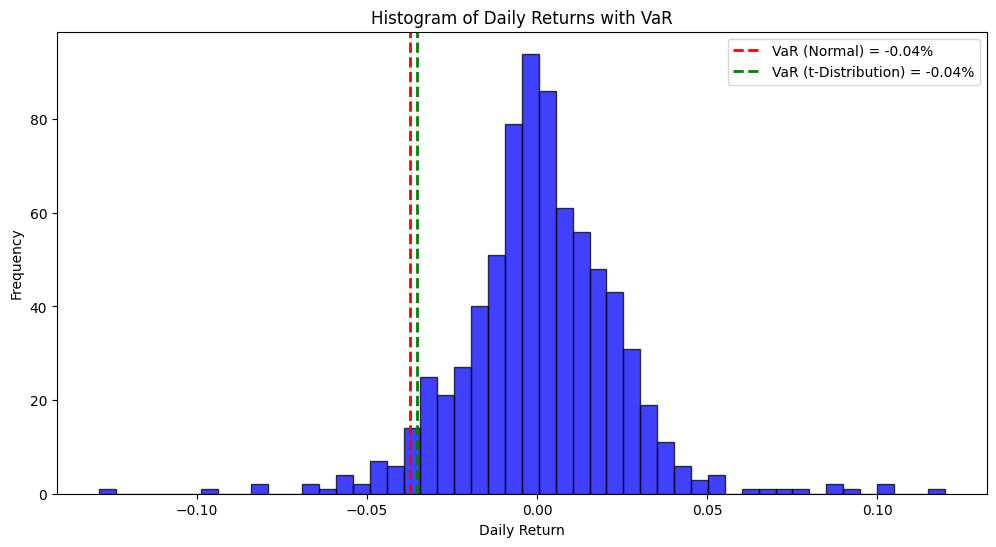

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm, t


ticker = 'AAPL'  
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
returns = data['Adj Close'].pct_change().dropna()  

mean_return = returns.mean()
std_dev_return = returns.std()

confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)
VaR_parametric_normal = mean_return + z_score * std_dev_return

df = 5  
t_score = t.ppf(1 - confidence_level, df)
VaR_parametric_t = mean_return + t_score * std_dev_return * np.sqrt((df - 2) / df)

print(f"Value at Risk (VaR) using normal distribution at {confidence_level*100}% confidence level: {VaR_parametric_normal:.2f}%")
print(f"Value at Risk (VaR) using t-distribution at {confidence_level*100}% confidence level: {VaR_parametric_t:.2f}%")

plt.figure(figsize=(12, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_parametric_normal, color='red', linestyle='--', linewidth=2, label=f'VaR (Normal) = {VaR_parametric_normal:.2f}%')
plt.axvline(VaR_parametric_t, color='green', linestyle='--', linewidth=2, label=f'VaR (t-Distribution) = {VaR_parametric_t:.2f}%')
plt.title('Histogram of Daily Returns with VaR')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
ES_parametric_normal = mean_return - (std_dev_return * norm.pdf(norm.ppf(confidence_level)) / (1 - confidence_level))
ES_parametric_t = mean_return - (std_dev_return * (t.pdf(t_score, df) * (df + t_score**2) / ((df - 1) * (1 - confidence_level))))

print(f"Expected Shortfall (ES) using normal distribution at {confidence_level*100}% confidence level: {ES_parametric_normal:.2f}%")
print(f"Expected Shortfall (ES) using t-distribution at {confidence_level*100}% confidence level: {ES_parametric_t:.2f}%")


Expected Shortfall (ES) using normal distribution at 95.0% confidence level: -0.05%
Expected Shortfall (ES) using t-distribution at 95.0% confidence level: -0.07%
